In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gdf = gpd.read_file("parser/all_states_precincts_cname_neighbor_demo.json")

In [3]:
gdf.head(1)

,County,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,State,CName,Neighbors,Total Population,White,Black or African American,American Indian,Asian,Other Population,geometry
0,Bristol,0101,1027,522,60,23,2,1634,ri,ri-bristol-0101,"ri-bristol-0101,ri-bristol-0102; ri-bristol-01...",3268,3055,23,3,110,73,"POLYGON ((-71.32270 41.77270, -71.32270 41.772..."


In [4]:
va = gdf[gdf["State"] == "va"]
rest = gdf[gdf["State"] != "va"]

In [5]:
va.head(1)

,County,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,State,CName,Neighbors,Total Population,White,Black or African American,American Indian,Asian,Other Population,geometry
9501,Accomack,0001,486,637,16,8,4,2328,va,va-accomack-0001,"va-accomack-0001,va-accomack-0010; va-accomack...",3526,2336,906,12,20,246,"POLYGON ((-75.66233 37.77053, -75.66244 37.770..."


In [6]:
vaCounty = gpd.read_file("VA/geographic/County/VA_County_Cleaned.json")
vaCounty.head(1)

,County,geometry
0,Accomack County,"POLYGON ((-75.62204 37.45679, -75.62465 37.457..."


In [7]:
g = vaCounty[vaCounty["County"] == "Rockbridge County"]

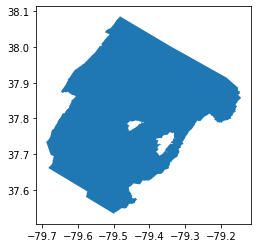

In [9]:
g.plot()

In [8]:
cityMapper = {}
# will not delete now
def mergeAndDelete(gdf, mergerName, mergeeName, cityMapper, debug=False):
    cityMapper[mergeeName] = mergerName
    
    vaCounty["New"] = ""
    countyIndex = gdf[gdf["County"] == mergerName].index.to_list()[0]
    cityIndex = gdf[gdf["County"] == mergeeName].index.to_list()[0]
    
    if debug:
        print(countyIndex, cityIndex)
    
    countyShape = gdf.at[countyIndex, "geometry"]
    cityShape = gdf.at[cityIndex, "geometry"]
    
    if debug:
        print("\n", type(countyShape))
        print(type(cityShape))
        print("\n", countyShape.intersects(cityShape), "\n")

    new_m = ""
    if countyShape.geom_type == "MultiPolygon" and cityShape.geom_type == "MultiPolygon":
        new_m = MultiPolygon([s for s in countyShape] + [s for s in cityShape])
        if debug:
            print("mode MM")
    elif countyShape.geom_type == "MultiPolygon" and cityShape.geom_type == "Polygon":
        if debug:
            print("mode MP")
        new_m = MultiPolygon([s for s in countyShape] + [cityShape])
    elif countyShape.geom_type == "Polygon" and cityShape.geom_type == "MultiPolygon":
        if debug:
            print("mode PM")
        new_m = MultiPolygon([s for s in cityShape] + [countyShape])
    else:
        if debug:
            print("mode PP")
        new_m = MultiPolygon([countyShape, cityShape])
    
    for index, row in gdf.iterrows():
        if index != countyIndex:
            gdf.at[index, "New"] = gdf.at[index, "geometry"]
    
    gdf.at[countyIndex, "New"] = new_m
    # gdf.drop(index=cityIndex, inplace=True)
    gdf.set_geometry("New", inplace=True, drop=True)
    
    return gdf

In [9]:
def deletionTest(gdf, county):
    return gdf.drop(gdf[gdf["County"] == county].index.to_list()[0]).copy()

In [10]:
# "Wise County", "Norton City"
vaCounty = mergeAndDelete(vaCounty, "Wise County", "Norton City", cityMapper)

In [11]:
# "Washington County" "Bristol City"
vaCounty = mergeAndDelete(vaCounty, "Washington County", "Bristol City", cityMapper)

In [12]:
# "Hnery County" "Martinsville City"
vaCounty = mergeAndDelete(vaCounty, "Henry County", "Martinsville City", cityMapper)

In [13]:
# "Roanoke County", "Salem City"
vaCounty = mergeAndDelete(vaCounty, "Roanoke County", "Salem City", cityMapper)

In [14]:
# "Roanoke County", "Roanoke City"
vaCounty = mergeAndDelete(vaCounty, "Roanoke County", "Roanoke City", cityMapper)

In [15]:
# "Alleghany County", "Covington City"
vaCounty = mergeAndDelete(vaCounty, "Alleghany County", "Covington City", cityMapper)

In [16]:
# "Rockbridge County", "Lexington City""
vaCounty = mergeAndDelete(vaCounty, "Rockbridge County", "Lexington City", cityMapper)
# "Rockbridge County", "Buena Vista City"
vaCounty = mergeAndDelete(vaCounty, "Rockbridge County", "Buena Vista City", cityMapper)

In [17]:
# "Augusta County", ""Staunton City"
vaCounty = mergeAndDelete(vaCounty, "Augusta County", "Staunton City", cityMapper)
# "Augusta County", ""Waynesboro City"
vaCounty = mergeAndDelete(vaCounty, "Augusta County", "Waynesboro City", cityMapper)

In [18]:
# "Rockingham County", ""Harrisonburg City"
vaCounty = mergeAndDelete(vaCounty, "Rockingham County", "Harrisonburg City", cityMapper)

In [19]:
# "Albemarle County", ""Charlottesville City"
vaCounty = mergeAndDelete(vaCounty, "Albemarle County", "Charlottesville City", cityMapper)

In [20]:
# "Greensville County", "Emporia City"
vaCounty = mergeAndDelete(vaCounty, "Greensville County", "Emporia City", cityMapper)

In [21]:
# "Chesterfield County", "Colonial Heights City"
vaCounty = mergeAndDelete(vaCounty, "Chesterfield County", "Colonial Heights City", cityMapper)

In [22]:
# "Prince George County", "Hopewell City"
vaCounty = mergeAndDelete(vaCounty, "Prince George County", "Hopewell City", cityMapper)

In [23]:
# "Frederick County", "Winchester City"
vaCounty = mergeAndDelete(vaCounty, "Frederick County", "Winchester City", cityMapper)

In [24]:
# "Prince William County", "Manassas City"
vaCounty = mergeAndDelete(vaCounty, "Prince William County", "Manassas City", cityMapper)
# "Prince William County", "Manassas Park City"
vaCounty = mergeAndDelete(vaCounty, "Prince William County", "Manassas Park City", cityMapper)

In [25]:
# "Fairfax County", "Fairfax City"
vaCounty = mergeAndDelete(vaCounty, "Fairfax County", "Fairfax City", cityMapper)

In [26]:
# "Pittsylvania County", "Danville City"
vaCounty = mergeAndDelete(vaCounty, "Pittsylvania County", "Danville City", cityMapper)

In [27]:
vaCounty.to_file("VA/geographic/County/VA_County_CityFixed2.json", driver="GeoJSON")

# done fixing county and city, now fix them in the precinct dataset

In [658]:
cityMapper

{'Norton City': 'Wise County',
 'Bristol City': 'Washington County',
 'Martinsville City': 'Henry County',
 'Salem City': 'Roanoke County',
 'Roanoke City': 'Roanoke County',
 'Covington City': 'Alleghany County',
 'Lexington City': 'Rockbridge County',
 'Buena Vista City': 'Rockbridge County',
 'Staunton City': 'Augusta County',
 'Waynesboro City': 'Augusta County',
 'Harrisonburg City': 'Rockingham County',
 'Charlottesville City': 'Albemarle County',
 'Emporia City': 'Greensville County',
 'Colonial Heights City': 'Chesterfield County',
 'Hopewell City': 'Prince George County',
 'Winchester City': 'Frederick County',
 'Manassas City': 'Prince William County',
 'Manassas Park City': 'Prince William County',
 'Fairfax City': 'Fairfax County',
 'Danville City': 'Pittsylvania County'}

In [659]:
def normalize(string):
    splited = string.split(" ")
    if splited[1] != "County":
        return ''.join(splited)
    else:
        return splited[0]

In [660]:
for index, row in vaCounty.iterrows():
    vaCounty.at[index, "County"] = normalize(row["County"])

In [661]:
norm_mapper = {}
for key, value in cityMapper.items():
    norm_mapper[normalize(key)] = normalize(value)
norm_mapper

{'NortonCity': 'Wise',
 'BristolCity': 'Washington',
 'MartinsvilleCity': 'Henry',
 'SalemCity': 'Roanoke',
 'RoanokeCity': 'Roanoke',
 'CovingtonCity': 'Alleghany',
 'LexingtonCity': 'Rockbridge',
 'BuenaVistaCity': 'Rockbridge',
 'StauntonCity': 'Augusta',
 'WaynesboroCity': 'Augusta',
 'HarrisonburgCity': 'Rockingham',
 'CharlottesvilleCity': 'Albemarle',
 'EmporiaCity': 'Greensville',
 'ColonialHeightsCity': 'Chesterfield',
 'HopewellCity': 'PrinceGeorgeCounty',
 'WinchesterCity': 'Frederick',
 'ManassasCity': 'PrinceWilliamCounty',
 'ManassasParkCity': 'PrinceWilliamCounty',
 'FairfaxCity': 'Fairfax',
 'DanvilleCity': 'Pittsylvania'}

In [662]:
# check if all normalized name is correct
# og 133
realCounty = list(va["County"].unique())
normCounty = list(norm_mapper.keys()) + list(norm_mapper.values())

for name in normCounty:
    if name not in realCounty:
        print(name)

In [663]:
# change county name using mapper
for index, row in va.iterrows():
    county = row["County"]
    if county in norm_mapper.keys():
        va.at[index, "County"] = norm_mapper[county]

In [664]:
len(va["County"].unique())

113

# fix va cname

In [668]:
for index, row in va.iterrows():
    va["CName"] = "va-" + row["County"] + "-" + row["Precinct #"]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [669]:
merged = pd.concat([va, rest], ignore_index=True)

In [670]:
merged["State"].unique()

array(['va', 'ri', 'tx'], dtype=object)

In [671]:
merged.head(2)

,County,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,State,CName,Neighbors,Total Population,White,Black or African American,American Indian,Asian,Other Population,geometry
0,Accomack,0001,486,637,16,8,4,2328,va,va-York-2446,"va-accomack-0001,va-accomack-0010; va-accomack...",3526,2336,906,12,20,246,"POLYGON ((-75.66233 37.77053, -75.66244 37.770..."
1,Accomack,0002,175,553,13,1,1,1500,va,va-York-2446,"va-accomack-0002,va-accomack-0003; va-accomack...",1522,900,492,4,7,112,"POLYGON ((-75.41651 37.93483, -75.41645 37.934..."


In [672]:
merged.to_file("all_states_precincts_cname_neighbor_demo.json", driver="GeoJSON")